In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [45]:
def generator(T=100, ampl=0.05):
    np.random.seed(0)
    x = np.arange(0, 2 * T + 1)
    sig = np.sin(2.0*np.pi*x / T)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sig+noise

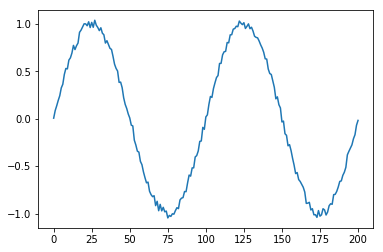

In [46]:
f = generator()
plt.plot(f)

In [47]:
def make_dataset(low_data, n_prev = 100):
    
    data, target = [],[]
    maxlen = 25
    
    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i+maxlen])
        target.append(low_data[i+maxlen])
        
    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)
    
    return re_data, re_target
        

In [48]:
g, h = make_dataset(f)

In [49]:
g.shape, h.shape

((176, 25, 1), (176, 1))

In [50]:
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

In [51]:
model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 1s 7ms/step - loss: 0.5498 - val_loss: 0.1642
Epoch 2/100
158/158 [==============================] - 0s 255us/step - loss: 0.3793 - val_loss: 0.0629
Epoch 3/100
158/158 [==============================] - 0s 219us/step - loss: 0.2429 - val_loss: 0.0292
Epoch 4/100
158/158 [==============================] - 0s 239us/step - loss: 0.1415 - val_loss: 0.1287
Epoch 5/100
158/158 [==============================] - 0s 222us/step - loss: 0.1052 - val_loss: 0.2390
Epoch 6/100
158/158 [==============================] - 0s 217us/step - loss: 0.1148 - val_loss: 0.1720
Epoch 7/100
158/158 [==============================] - 0s 217us/step - loss: 0.0812 - val_loss: 0.0838
Epoch 8/100
158/158 [==============================] - 0s 226us/step - loss: 0.0488 - val_loss: 0.0359
Epoch 9/100
158/158 [==============================] - 0s 220us/step - loss: 0.0387 - val_loss: 0.0175
Epoch 10/100
158/158 [========

In [53]:
predicted = model.predict(g)

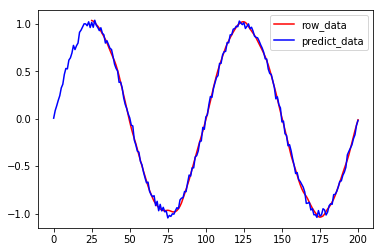

In [54]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="row_data")
plt.plot(range(0, len(f)), f, color="b", label="predict_data")
plt.legend()
plt.show()

In [55]:
future_test = g[175].T

In [ ]:
# 1つの学習データの時間の長さ -> 25
time_length = future_test.shape[1]
# 未来の予測データを保存していく変数
future_result = np.empty((1))

# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)


# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color="g", label="future_predict")
plt.legend()
plt.show()